In [ ]:
from google.colab import files
files.upload()

Saving student-mat.csv to student-mat.csv


{'student-mat.csv': b'school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3\n"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6\n"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6\n"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10\n"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15\n"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10\n"GP";"M";16;"U";"LE3";"T";4;3;"service

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('student-mat.csv',sep = ';')

In [ ]:
dataset.shape

(395, 33)

In [ ]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [6]:
dataset = dataset[['G1','G2','G3','studytime','failures','absences']]

In [7]:
dataset.shape

(395, 6)

In [8]:
dataset.isna().sum()

G1           0
G2           0
G3           0
studytime    0
failures     0
absences     0
dtype: int64

In [9]:
dataset.drop_duplicates(inplace = True)

In [10]:
dataset.shape

(380, 6)

In [11]:
predict = 'G3'

In [13]:
X = np.array(dataset.drop([predict], axis = 1))

In [14]:
Y = np.array(dataset[predict])

In [15]:
from sklearn import linear_model
from sklearn import model_selection

In [16]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size = 0.2)

In [17]:
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
acc = linear.score(x_test,y_test)

In [19]:
print(acc)

0.8010381225774124


In [20]:
import pickle
from matplotlib import style

In [21]:
print("Coefficient: \n",linear.coef_)
print("Intercept:'\n",linear.intercept_)

Coefficient: 
 [ 0.14256007  0.96577924 -0.1338839  -0.38456409  0.02692497]
Intercept:'
 -1.1735671392822624


In [22]:
with open("studentmodel.pickle","wb") as f:
  pickle.dump(linear,f)

In [23]:
pickle_in = open("studentmodel.pickle","rb")

In [24]:
linear = pickle.load(pickle_in)

In [26]:
predictions = linear.predict(x_test)

In [31]:
best = 0
for _ in range(30):
  x_train, x_test, y_train, y_test = model_selection.train_test_split(X,Y,test_size = 0.2)
  linear = linear_model.LinearRegression()
  linear.fit(x_train,y_train)
  acc = linear.score(x_test,y_test)
  print(acc)

  if acc > best:
    best = acc
    with open("studentmodel.pickle","wb") as f:
      pickle.dump(linear,f)

0.7944878507543859
0.8491084672777816
0.8677294312978858
0.8044232132903582
0.677155322955785
0.8711553647281722
0.8073166985005474
0.7915281663822135
0.7584514253952088
0.8250085411544167
0.9060882010266091
0.801466298696138
0.8473416083292922
0.818286581955405
0.8324737680133911
0.8407329525365899
0.8326782798418906
0.8162065518700828
0.8345192045921654
0.7627088742477067
0.8280492473487939
0.7700494468259029
0.8435736057010259
0.8468590759106476
0.8187492726105058
0.7213635055966316
0.7990715897767692
0.8155379053181511
0.7550264919374667
0.8930743978957557


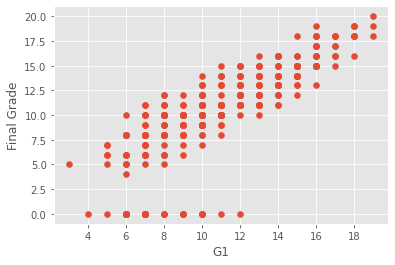

In [34]:
p = 'G1'
style.use("ggplot")
plt.scatter(dataset[p],dataset['G3'])
plt.xlabel(p)
plt.ylabel("Final Grade")
plt.show()